In [1]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.applications.vgg16 import VGG16
import keras
import os
import pickle
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
def load_data():
    file = open('/content/drive/MyDrive/colab/phan_loai_tien/pix.data', 'rb')

    # dump information to that file
    (pixels, labels) = pickle.load(file)

    # close the file
    file.close()

    return pixels, labels

In [3]:
X, y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(3200, 128, 128, 3)
(3200, 4)
(800, 128, 128, 3)


In [4]:
model_vgg16 = VGG16(weights='imagenet', include_top = False)
for layer in model_vgg16.layers:
  layer.trainable = False

input = Input(shape=(128,128,3), name='image_input')
output_vgg16 = model_vgg16(input)
x = Flatten(name='Flatten')(output_vgg16)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu', name='fc2')(x)
x = Dense(4, activation='softmax', name='output')(x)

my_model = Model(inputs=input, outputs=x)
my_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

58900480/58889256 [==============================] - 0s 0us/step


In [5]:
aug = ImageDataGenerator(rotation_range=20,
                         zoom_range=0.1,
                         rescale=1./255,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         horizontal_flip=True,
                         brightness_range=[0.2,1.5], fill_mode="nearest")

aug_val = ImageDataGenerator(rotation_range=20,
                         zoom_range=0.1,
                         rescale=1./255,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         horizontal_flip=True,
                         brightness_range=[0.2,1.5], fill_mode="nearest")

In [6]:
H = my_model.fit(aug.flow(X_train, y_train, batch_size=64),
                               epochs=10,
                               validation_data=aug.flow(X_test,y_test,
                               batch_size=64))
my_model.save('/content/drive/MyDrive/colab/phan_loai_tien/phanloaitien.h5')

Epoch 1/10
50/50 [==============================] - 31s 398ms/step - loss: 0.5709 - accuracy: 0.7659 - val_loss: 0.2219 - val_accuracy: 0.8975
Epoch 2/10
50/50 [==============================] - 19s 382ms/step - loss: 0.1735 - accuracy: 0.9353 - val_loss: 0.1087 - val_accuracy: 0.9513
Epoch 3/10
50/50 [==============================] - 17s 347ms/step - loss: 0.1134 - accuracy: 0.9597 - val_loss: 0.0768 - val_accuracy: 0.9775
Epoch 4/10
50/50 [==============================] - 17s 349ms/step - loss: 0.1027 - accuracy: 0.9625 - val_loss: 0.0716 - val_accuracy: 0.9750
Epoch 5/10
50/50 [==============================] - 17s 349ms/step - loss: 0.0803 - accuracy: 0.9709 - val_loss: 0.0785 - val_accuracy: 0.9700
Epoch 6/10
50/50 [==============================] - 17s 348ms/step - loss: 0.0682 - accuracy: 0.9772 - val_loss: 0.0383 - val_accuracy: 0.9887
Epoch 7/10
50/50 [==============================] - 17s 348ms/step - loss: 0.0792 - accuracy: 0.9694 - val_loss: 0.0763 - val_accuracy: 0.9725

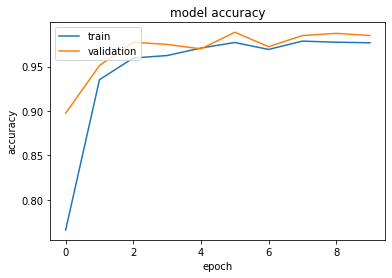

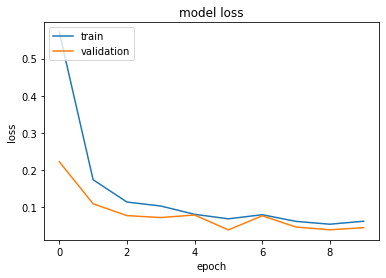

In [7]:
#  "Accuracy"
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()